# First Project on Data analysis


In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Csv file

In [132]:
data = pd.read_csv("project_1_data.csv")


### Checking all the data


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [134]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [135]:
df = pd.DataFrame(data)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [136]:
df.isnull().any().sum()
print(df.isnull().sum())

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


#### Deleting Null Value

In [137]:
df.dropna(inplace=True)

In [138]:
df.isnull().any().sum()
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### Checking Duplicate values

In [139]:
df.duplicated().any().sum()

1

#### Deleting Duplicate value

In [140]:
df.drop_duplicates(inplace=True)

In [141]:
df.duplicated().any().sum()

0

#### Columns

In [142]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#### Data Types

In [143]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [144]:
df['InvoiceDate'].dtypes

dtype('O')

In [145]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].dtype

dtype('<M8[ns]')

# Analtical Questions 

#### 1. Total Revenue Calculation: What is the total revenue generated from the sales in this dataset?


In [146]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [147]:
df['TotalRevenue'] = df['Quantity']*df['UnitPrice']


In [148]:
df['TotalRevenue']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalRevenue, Length: 535187, dtype: float64

In [149]:
totalRevenue = df['TotalRevenue'].sum()
print(f"Total Revenue is {totalRevenue} dollars")

Total Revenue is 9726006.954 dollars


#### 2. Top Customers: Who are the top 10 customers in terms of total revenue?

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     535187 non-null  object        
 1   StockCode     535187 non-null  object        
 2   Description   535187 non-null  object        
 3   Quantity      535187 non-null  int64         
 4   InvoiceDate   535187 non-null  datetime64[ns]
 5   UnitPrice     535187 non-null  float64       
 6   CustomerID    535187 non-null  int64         
 7   Country       535187 non-null  object        
 8   TotalRevenue  535187 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 40.8+ MB


In [151]:
top_customers = df.groupby('CustomerID')['TotalRevenue'].sum().nlargest(10)

In [152]:
top_customers

CustomerID
15287    1447972.77
14646     279489.02
18102     256438.49
17450     187322.17
14911     132458.73
12415     123725.45
14156     113214.59
17511      88125.38
16684      65892.08
13694      62690.54
Name: TotalRevenue, dtype: float64

#### 3. Sales by Country: What are the total sales per country?

In [153]:
salesByCoyntry = df.groupby('Country')['TotalRevenue'].sum()
salesByCoyntry

Country
Australia                137009.770
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20076.390
Cyprus                    12858.760
Czech Republic              707.720
Denmark                   18768.140
EIRE                     262993.380
European Community         1291.750
Finland                   22326.740
France                   197317.110
Germany                  221509.470
Greece                     4710.520
Hong Kong                  9908.240
Iceland                    4310.000
Israel                     7901.970
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213.140
Portugal            

#### 4. Monthly Sales Trends: How do sales trends vary on a monthly basis?

In [154]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalRevenue'],
      dtype='object')

In [155]:
import datetime as dt

In [156]:
df['Month'] = df['InvoiceDate'].dt.month
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [157]:
df['Month_Name']=df['InvoiceDate'].dt.month_name()
df['Month_Name'].unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [158]:
df['Year']= df['InvoiceDate'].dt.year
df['Year'].unique()

array([2010, 2011])

In [159]:
monthlySales = df.groupby(['Year','Month','Month_Name'])['TotalRevenue'].sum()
print(monthlySales)

Year  Month  Month_Name
2010  12     December       746723.610
2011  1      January        558448.560
      2      February       497026.410
      3      March          682013.980
      4      April          492367.841
      5      May            722094.100
      6      June           689977.230
      7      July           680156.991
      8      August         681386.460
      9      September     1017596.682
      10     October       1069368.230
      11     November      1456145.800
      12     December       432701.060
Name: TotalRevenue, dtype: float64


#### 5. Most Popular Products: What are the top 10 best-selling products by quantity?

In [160]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Month,Month_Name,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,12,December,2010


In [161]:
print(df['Description'].nunique())
print(df['StockCode'].nunique())
# why both are not same.....?

4223
3958


checking which has duplicate values

In [162]:
product = df.groupby(['StockCode','Description'])['Quantity'].sum().reset_index()
product

,StockCode,Description,Quantity
0,10002,INFLATABLE POLITICAL GLOBE,860
1,10080,GROOVY CACTUS INFLATABLE,303
2,10080,check,22
3,10120,DOGGY RUBBER,192
4,10123C,HEARTS WRAPPING TAPE,5
...,...,...,...
4787,gift_0001_20,to push order througha s stock was,10
4788,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,7
4789,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,3
4790,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,4


In [163]:
# Top 10 products
topProduct = product.sort_values(by='Quantity',ascending=False).head(10)
topProduct

,StockCode,Description,Quantity
3617,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
4197,85099B,JUMBO BAG RED RETROSPOT,47260
1333,22197,POPCORN HOLDER,36322
3956,84879,ASSORTED COLOUR BIRD ORNAMENT,36282
531,21212,PACK OF 72 RETROSPOT CAKE CASES,36016
4223,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35006
2344,23084,RABBIT NIGHT LIGHT,30631
1630,22492,MINI PAINT SET VINTAGE,26437
1775,22616,PACK OF 12 LONDON TISSUES,26299
1122,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24719


#### 6. Average Order Value: What is the average order value for each customer?

In [164]:
df.head(0)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Month,Month_Name,Year


In [165]:
avarage_order = df.groupby('CustomerID')['TotalRevenue'].mean()
print(avarage_order)

CustomerID
12346     0.000000
12347    23.681319
12348    57.975484
12349    24.076027
12350    19.670588
           ...    
18280    18.060000
18281    11.545714
18282    13.584615
18283     2.837074
18287    26.246857
Name: TotalRevenue, Length: 4372, dtype: float64


### 7. Frequent Buyers: Which customers made the most frequent purchases?

In [166]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalRevenue', 'Month',
       'Month_Name', 'Year'],
      dtype='object')

In [167]:
freq_buyer = df.groupby('CustomerID').size().reset_index(name='TotalPurchase')
freq_buyer

,CustomerID,TotalPurchase
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4367,18280,10
4368,18281,7
4369,18282,13
4370,18283,721


In [168]:

topFreqBuyer = freq_buyer.sort_values(by='TotalPurchase',ascending=False)
topFreqBuyer

,CustomerID,TotalPurchase
2175,15287,133604
4042,17841,7812
1895,14911,5898
1300,14096,5128
330,12748,4459
...,...,...
2938,16323,1
727,13302,1
3020,16428,1
704,13270,1


### 8. Sales on Weekdays vs. Weekends: How do sales compare between weekdays and weekends?

In [169]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalRevenue', 'Month',
       'Month_Name', 'Year'],
      dtype='object')

In [170]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
weekday_sales = df[df['DayOfWeek'] < 5]['TotalRevenue'].sum()
weekend_sales = df[df['DayOfWeek'] >= 5]['TotalRevenue'].sum()
print(f"Weekday Sales: {weekday_sales}\nWeekend Sales: {weekend_sales}")


Weekday Sales: 8927347.493000003
Weekend Sales: 798659.461


#### 9. Repeat Purchase Rate: What percentage of customers made repeat purchases?


In [171]:
# checking if a customer repeat perchase or not
df['CustomerID'].duplicated().any()

True

In [172]:
df['CustomerID'].nunique()

4372

In [173]:
total=df['CustomerID'].count()
total

535187

In [174]:

repeat_customers = df['CustomerID'].nunique() / total
print(f"Repeat Purchase Rate: {repeat_customers * 100}%")


Repeat Purchase Rate: 0.8169107246625945%


### 10.High-Value Orders: What are the highest-value orders in the dataset?

In [175]:
high_value_orders = df.nlargest(10, 'TotalRevenue')
high_value_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Month,Month_Name,Year,DayOfWeek
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60,12,December,2011,4
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60,1,January,2011,1
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.00,6,June,2011,4
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,15287,United Kingdom,13541.33,12,December,2010,1
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,15287,United Kingdom,11062.06,8,August,2011,4
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75,5,May,2011,1
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450,United Kingdom,7144.72,9,September,2011,1
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749,United Kingdom,6539.40,1,January,2011,1
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749,United Kingdom,6539.40,4,April,2011,0
421601,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27 12:11:00,2.08,14646,Netherlands,4992.00,10,October,2011,3


# Visualization Questions


#### 1. Revenue Over Time: Create a line chart showing total monthly revenue. 

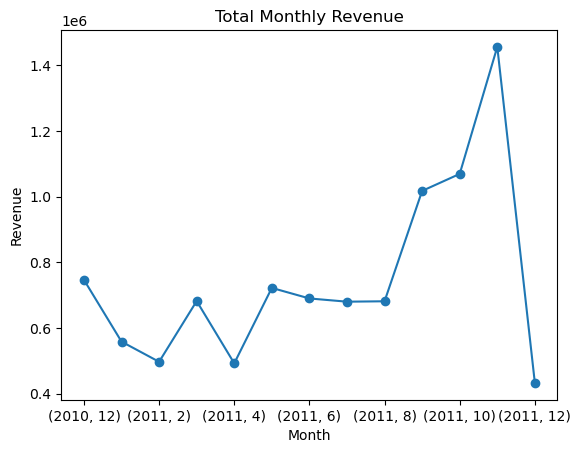

In [176]:
monthlySales = df.groupby(['Year','Month'])['TotalRevenue'].sum()
monthlySales.plot(kind='line', title='Total Monthly Revenue',marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

#### 2. Sales Distribution by Country: Create a bar chart showing sales distribution across different countries.

In [177]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalRevenue', 'Month',
       'Month_Name', 'Year', 'DayOfWeek'],
      dtype='object')

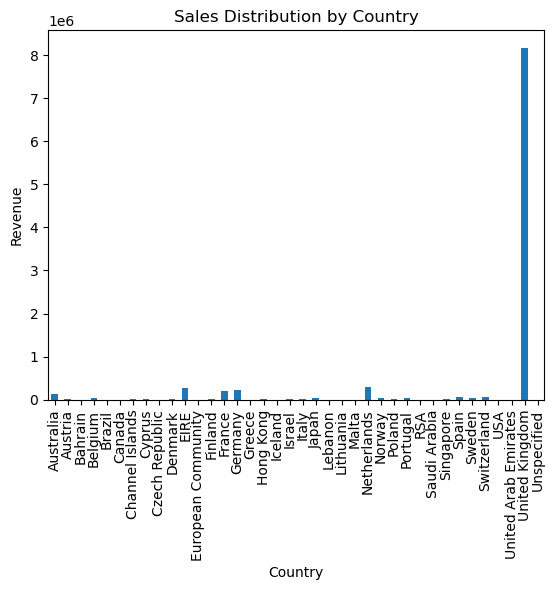

In [178]:
salesByCoyntry.plot(kind='bar', title='Sales Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()

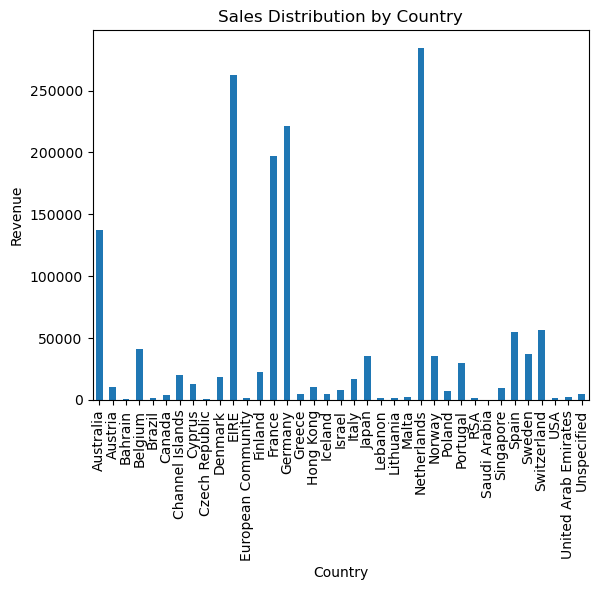

In [179]:
s = salesByCoyntry.drop(salesByCoyntry[salesByCoyntry.index == 'United Kingdom'].index)

s.plot(kind='bar', title='Sales Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()

#### 3. Top Products by Sales: Create a bar chart for the top 10 best-selling products.

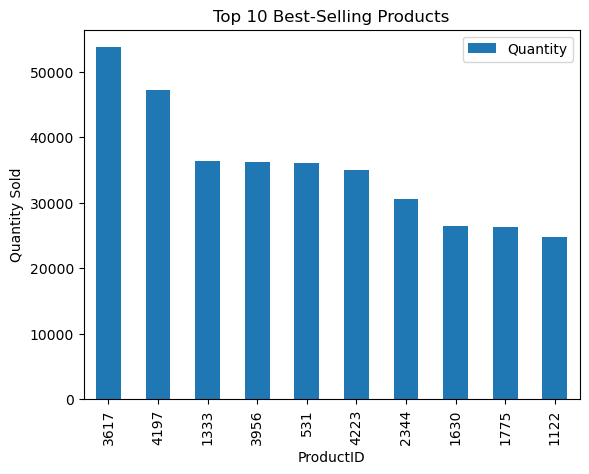

In [180]:
topProduct.plot(kind='bar', title='Top 10 Best-Selling Products')
plt.xlabel('ProductID')
plt.ylabel('Quantity Sold')
plt.show()


#### 4. Customer Segmentation: Create a scatter plot showing customer segmentation based on their total revenue and frequency of purchases.

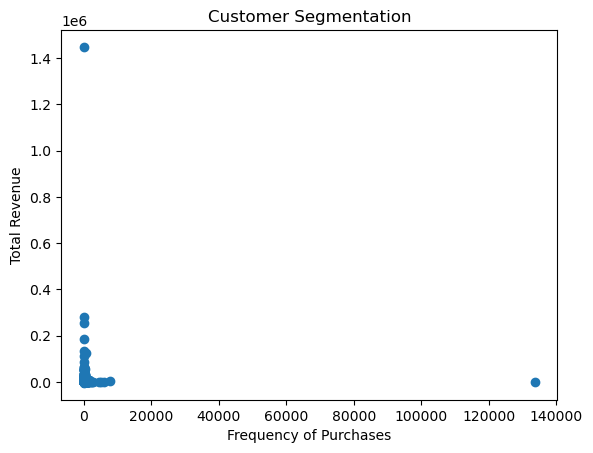

In [181]:
purchase_frequency = df['CustomerID'].value_counts()
total_revenue_by_customer = df.groupby('CustomerID')['TotalRevenue'].sum()

plt.scatter(purchase_frequency, total_revenue_by_customer)
plt.title('Customer Segmentation')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Total Revenue')
plt.show()


#### 5. Sales Heatmap: Create a heatmap showing sales by day of the week and time of day.


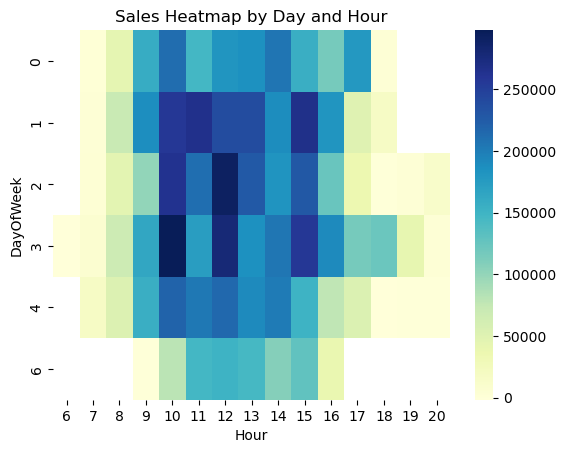

In [182]:
import seaborn as sns

df['Hour'] = df['InvoiceDate'].dt.hour
heatmap_data = df.pivot_table(index='DayOfWeek', columns='Hour', values='TotalRevenue', aggfunc='sum')
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Sales Heatmap by Day and Hour')
plt.show()


#### 6. Product Sales Trends: Create a line chart showing the sales trends of the top 5 products over time.


In [183]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalRevenue', 'Month',
       'Month_Name', 'Year', 'DayOfWeek', 'Hour'],
      dtype='object')

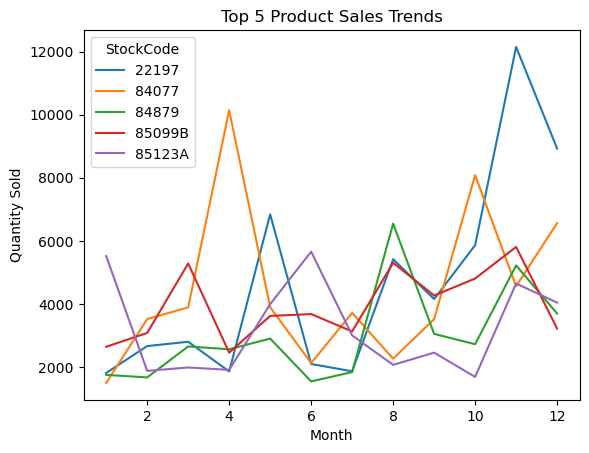

In [184]:
top_5_products = df.groupby('StockCode')['Quantity'].sum().nlargest(5).index
top_products_df = df[df['StockCode'].isin(top_5_products)]

top_products_trends = top_products_df.groupby(['Month', 'StockCode'])['Quantity'].sum().unstack()
top_products_trends.plot(kind='line', title='Top 5 Product Sales Trends')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.show()


#### 7. Revenue Distribution: Create a histogram showing the distribution of order values

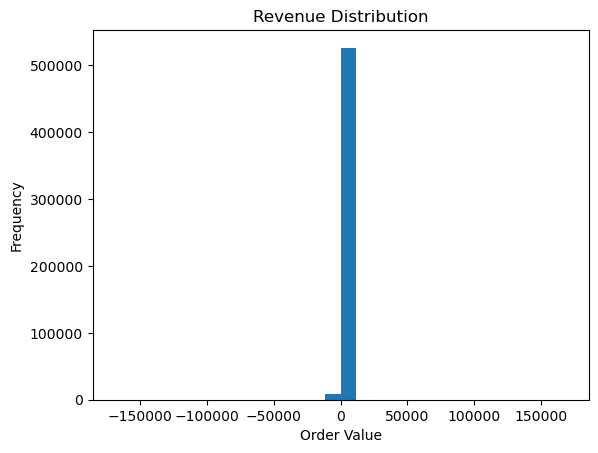

In [185]:
df['TotalRevenue'].plot(kind='hist', bins=30, title='Revenue Distribution')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()


#### 8. Top Customers: Create a bar chart for the top 10 customers by total revenue.


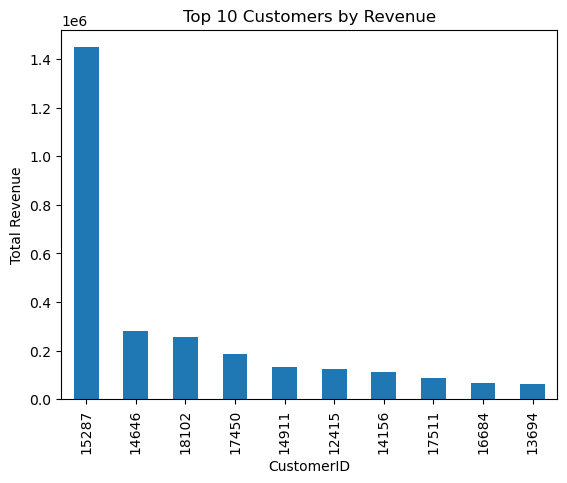

In [186]:
top_customers.plot(kind='bar', title='Top 10 Customers by Revenue')
plt.xlabel('CustomerID')
plt.ylabel('Total Revenue')
plt.show()


#### 9. Sales Performance: Create a dashboard combining multiple visualizations (e.g., revenue over time, top products, and sales by country).

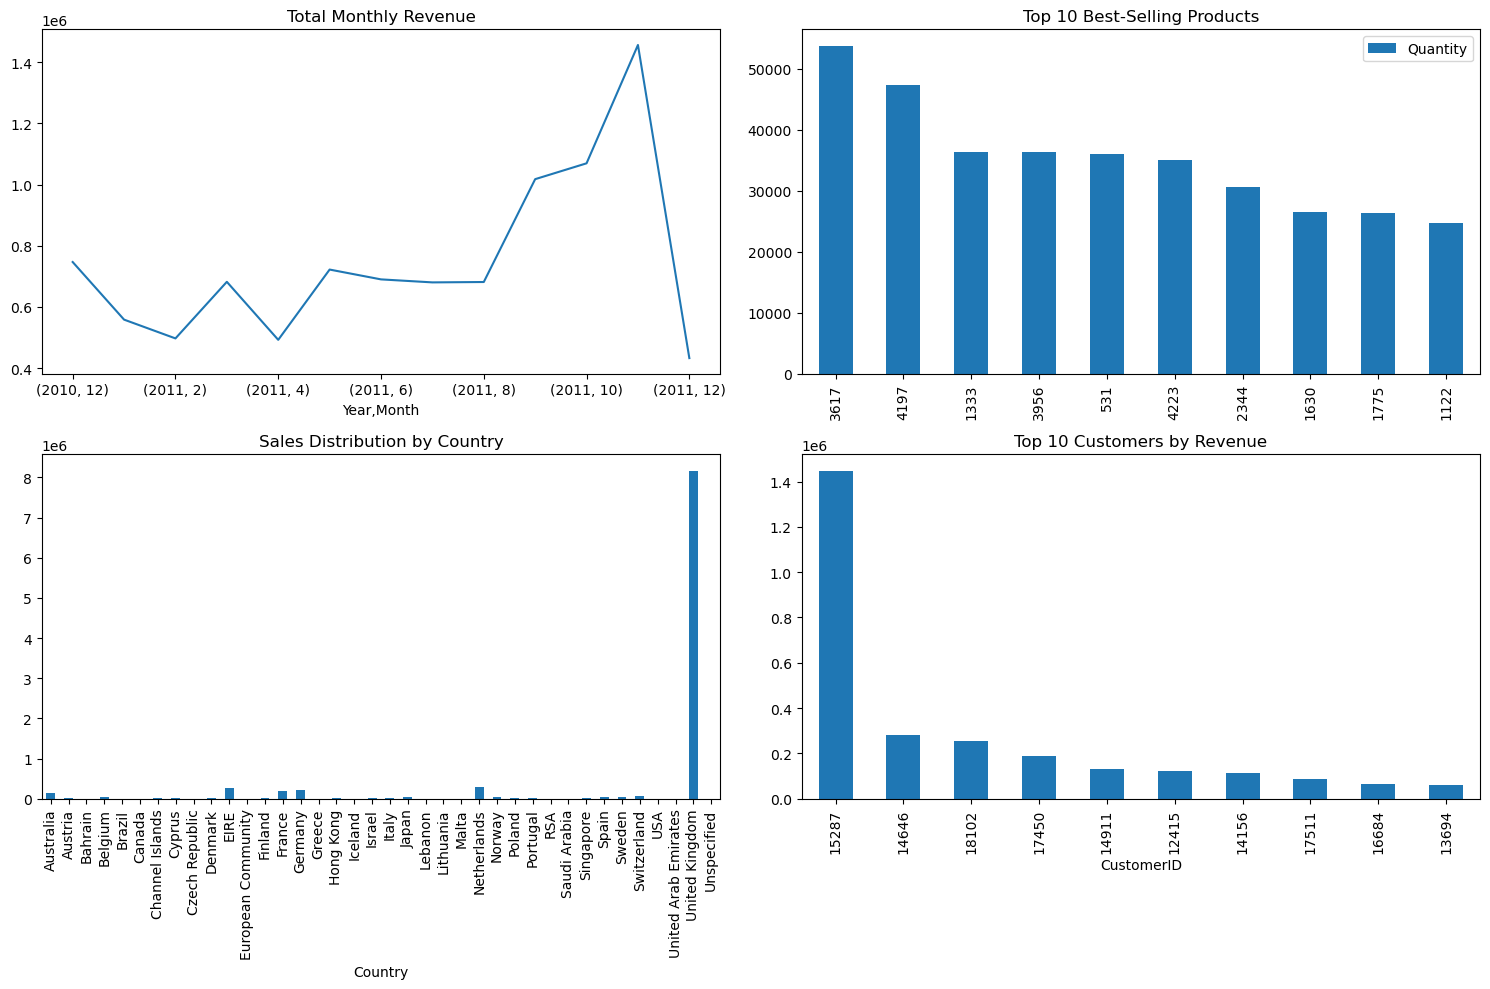

In [187]:

# Combine multiple visualizations using subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Revenue over time
monthlySales.plot(kind='line', ax=axs[0, 0], title='Total Monthly Revenue')

# Top products
topProduct.plot(kind='bar', ax=axs[0, 1], title='Top 10 Best-Selling Products')

# Sales by country
salesByCoyntry.plot(kind='bar', ax=axs[1, 0], title='Sales Distribution by Country')

# Top customers
top_customers.plot(kind='bar', ax=axs[1, 1], title='Top 10 Customers by Revenue')

plt.tight_layout()
plt.show()


#### 10.Customer Lifetime Value: Create a box plot showing the distribution of customer lifetime values.


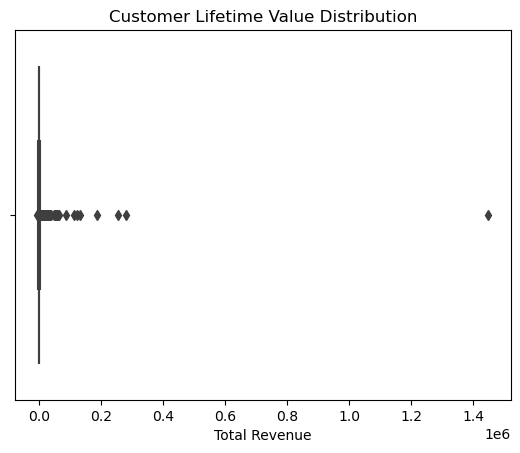

In [188]:

sns.boxplot(x=total_revenue_by_customer)
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Total Revenue')
plt.show()


#### 11.Show correlation matrix

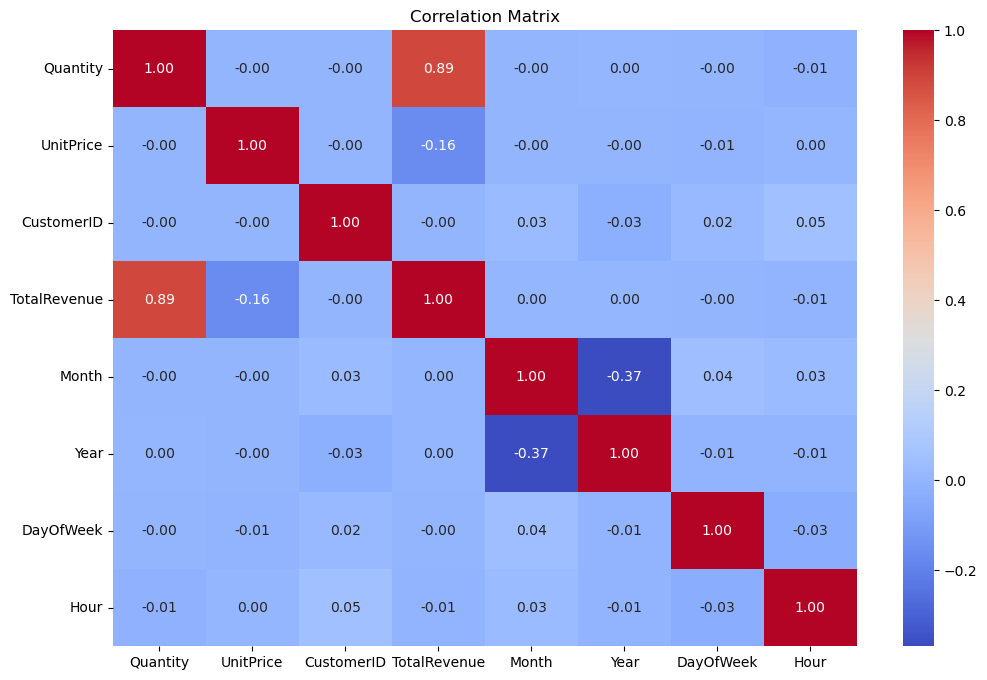

In [189]:

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
